In [30]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display
import IPython
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from datetime import datetime
import talib
import pandas_ta as ta
from talib.abstract import *
from math import *
%matplotlib inline

In [28]:
df = pd.read_json(r'./user_data/data/binance/BTC_USDT-1m.json')
df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']

df['time'] = pd.to_datetime(df['timestamp'], unit='ms', utc=False)
# df.index = df['time']
# df.set_index('time', drop=True, inplace=True)
df.set_index(pd.DatetimeIndex(df["time"]), inplace=True, drop=True)
# df = df[['time', 'symbol', 'source', 'resolution', 'open', 'high', 'low', 'close', 'volume']]
# df.to_csv (r'./data/binance/BTC_USDT-5m.csv', index = None)
# df.set_index('time')


In [44]:
# pd.Timestamp('now').floor('D') + pd.Timedelta(-7, unit='D')

# start_time = pd.Timestamp('now').floor('D') + pd.Timedelta(-7, unit='D')

start_time = pd.Timestamp('now') + pd.Timedelta(-1, unit='W')
# start_time
ddf = df.loc[df.index >= start_time].copy()
# ddf = df.loc[df['time'] >= start_time]
# ddf
dlen = len(ddf.index)

In [48]:
# ddf['abc'] = 1
# ddf.columns
ddf['kama1']

time
2021-06-08 02:00:00             NaN
2021-06-08 02:01:00             NaN
2021-06-08 02:02:00             NaN
2021-06-08 02:03:00             NaN
2021-06-08 02:04:00             NaN
                           ...     
2021-06-12 02:32:00    35862.250738
2021-06-12 02:33:00    35861.007538
2021-06-12 02:34:00    35859.326055
2021-06-12 02:35:00    35858.777765
2021-06-12 02:36:00    35857.056935
Name: kama1, Length: 5797, dtype: float64

In [25]:
kama1 = ta.SMA(ddf[:, 'close'], timeperiod=25)

TypeError: '(slice(None, None, None), 'close')' is an invalid key

In [56]:
# ta.kama(close=ddf['close'], length=20, fast=4, slow=50, append=False)
k1 = ta.kama(close=ddf['close'], append=False)
figure()


In [68]:
sl_n2= IntSlider(description="n2", min=0, max=floor(log(dlen, 2.0)), step=1, value=9)
sl_w = IntSlider(description="w", min=0, max=floor(dlen/pow(2,9)), step=1, value=0)
def update_sl_w_range(*args):
    wsize = pow(2,sl_n2.value)
    sl_w.max = floor(dlen/wsize) -1
sl_n2.observe(update_sl_w_range, 'value')


slCoolOff = IntSlider(description="cool", min=0, step=5, max=600, value=30)
slDowntrendWait = IntSlider(description="dnt", min=0, max=100, value=30)

slStopLoss = FloatSlider(description="sl", min=0, step=0.05, max=10,value=2)
slTarget = FloatSlider(description="tgt", min=0, step=0.2, max=10, value=2)

slKama1N = IntSlider(description="k1n", min=0, step=5, max=100, value=10)
slKama1Fast = FloatSlider(description="k1f", min=0, step=1, max=100, value=2)
slKama1Slow = FloatSlider(description="k1s", min=0, step=1, max=300, value=30)
slKama1Channel= FloatSlider(description="k1c", min=0, step=0.05, max=5, value=0)


ui = widgets.VBox([
#     widgets.HBox([slKama1N, slKama1Fast, slKama1Slow, slKama1Channel]),
    widgets.HBox([slKama1N, slKama1Fast, slKama1Slow, slKama1Channel]),
    widgets.HBox([slCoolOff, slDowntrendWait]),
    widgets.HBox([sl_n2, sl_w, slStopLoss, slTarget]),
])
    
# iKama1 = Interact.@map kama(&ivdf.close, n=&slKama1N, nfast=&slKama1Fast, nslow=&slKama1Slow)
# iKama1ChannelL = Interact.@map &iKama1 * (1-&slKama1Channel/100) 

def printer(w2log, w, cool, dnt, sl, tgt, k1n, k1f, k1s, k1c):
    wsz = floor(pow(2,w2log))
    wst = w * wsz
    wed = floor(wst + wsz)
    ddf["k1"] = ddf.ta.kama(length=k1n, nfast=k1f, nslow=k1s, append=False)
   
    ddf['k1c'] = ddf['k1'] * (1- k1c)
    wdf = ddf.iloc[wst:wed,:]
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))
    
    out1 = ax1.plot(wdf.index, wdf['close'], lw=0.5)
    out1 = ax1.plot(wdf.index, wdf['k1'], lw=0.5)
    
#     my_plotter(ax1, data1, data2, {'marker': 'x'})
#     my_plotter(ax2, data3, data4, {'marker': 'o'})

#     plt.figure(0)
#     plt.figure(figsize=(12,8))
#     wdf.plot(use_index=True, y="close", lw=0.5);
#     plt.plot(x=ddf.index, y=k1, lw=0.5);
    plt.show()
    

out = widgets.interactive_output(printer, {"w2log":sl_n2, "w":sl_w, "cool":slCoolOff, "dnt":slDowntrendWait,
                                "sl":slStopLoss, "tgt":slTarget, "k1n": slKama1N, "k1f": slKama1Fast, "k1s": slKama1Slow, "k1c": slKama1Channel})
    
# interactive_plot = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})
# interactive(printer,w2log=sl_n2, w=sl_w, cool=slCoolOff, dnt=slDowntrendWait,
#                                 sl=slStopLoss, tgt=slTarget);
display(ui, out)

# output = interactive_plot.children[-1]
# # output.layout.width = '1200px'
# output.layout.height = '500px'
# interactive_plot


Output()

In [ ]:
# display()

In [ ]:
# pow(2,12), len(ddf)

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

In [21]:
# list of functions
print (ta.get_functions())

# dict of functions by group
# print talib.get_function_groups()


['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR',

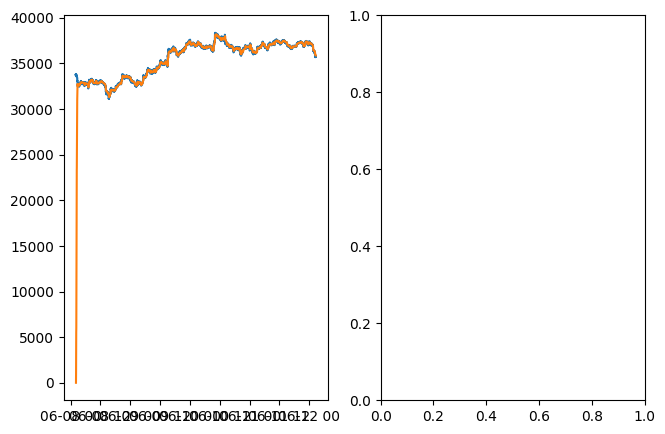

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2)
k1 = ddf.ta.kama(append=False)
out1 = ax1.plot(ddf.index, ddf['close'])
out1 = ax1.plot(ddf.index, k1)